# Convergence rates

The most appealing aspect of spectral methods is the potential of error that decreases like $c^{-N}$ rather than $N^{-p}$. However, in order to fully realize that potential, the underlying function being approximated must have a high level of smoothness. In fact, as stated below, it has to be **analytic** in a region containing the interval of approximation, meaning extensible to a differentiable function of a complex variable. 

Since sampling at grid size $h$ limits the scope of the wavenumber to $|k| \le \pi/h$, the key is to have a Fourier transform that decays rapidly, so that the amount of energy missed at grid size $h$ vanishes quickly as $h\to 0$. There are three steps to proving convergence rates. The first, which we will just accept as given from classical analysis, comes from tying the smoothness of a function to the decay rate of its Fourier transform. The second step is to bound the effect of discretization on that decay rate. Finally, the results on transforms can be translated into statements on pointwise convergence in physical space.

## Transform theorem

Theorem 4.1 and its successors in the text identify 4 levels of smoothness for a function $u\in L^2(\mathbb{R})$. In order of increasing smoothness, they are:

**Level 1, parameterized by integer $p$.** $u$ has $p-1$ continuous derivatives in $L^2$, and a $p$th derivative of bounded variation.

**Level 2.** $u$ has infinitely many continuous derivatives in $L^2$.

**Level 3, parameterized by $a>0$.** $u$ can be extended to an analytic function of $x\in \mathbb{C}$ in a strip $|\operatorname{Im}(z)| < a$, with $|u|$ uniformly bounded as an $L^2$ function along every horizontal line in the strip. 

**Level 4, parameterized by $a>0$.** $u$ can be extended to an entire function (differentiable in the whole complex plane) and is of *exponential type*, meaning that $|u(z)|=o(e^{a|z|})$ for some $a>0$.

Let's consider the results of Theorem 4.1 in reverse order. These are all "if and only if" statements.

At Level 4, the Fourier transform $\hat{u}$ is supported within the interval $[-a,a]$. That is, $u$ is actually a band-limited function. This result is known as the *Paley--Wiener Theorem*. 

At Level 3, the function

$$
e^{a|k| } \hat{u}(k)
$$

is in $L^2(\mathbb{R})$. This essentially dictates at least an exponential decay rate for $\hat{u}$. This level is generally the sweet spot for spectral methods.

Level 2 is the least frequently encountered in practice. There are a few well-known examples of infinitely differentiable functions that fail to be analytic on the whole real line, such as 

$$
u(x) = \begin{cases}
0,& x \le 0, \\ 
\exp(-1/x^2), & x>0. 
\end{cases}
$$

For such functions, the decay of $\hat{u}$ is beyond all algebraic orders, but not exponential. However, these rarely arise organically. 

Finally, Level 1 is limited to an algebraic decay rate, $\hat{u}(k) = O(|k|^{-p-1})$. The Gibbs phenomenon corresponds to a step or square wave function, which has $p=0$ and a decay rate of $1/|k|$. More examples follow later on.


## Aliasing effects

The next step is to apply an important identity:

::::{prf:theorem} Poisson summation formula / Aliasing formula
Suppose $u\in L^2(\mathbb{R})$ has a first derivative of bounded variation, and let $v$ be a grid function defined by $v_j=u(x_j)$ for all $x_j=jh$. Then for all $k$ with $|k| \le \pi/h$, 

$$
\hat{v}(k) = \sum_{m=-\infty}^\infty \hat{u}\left( k + \frac{2m\pi}{h} \right). 
$$
::::

This formula asserts that the transform of $v$ at wavenumber $k$ is simply the sum of the transform of $u$ at all the wavenumbers equivalent to $k$ on the grid. 

At each level, the decay rates on $\hat{u}$ can be used to bound the effects of the aliasing summation as functions of $h$.

At Level 1, $p-1$ continuous derivatives buys $|\hat{u}(k)-\hat{v}(k)| = O(h^{p+1})$. 

At Level 2, the aliasing error is beyond all orders.

At Level 3, the statement gets technical:

$$
|\hat{u}(k)-\hat{v}(k)| = O\bigl( e^{-\pi(a-\epsilon)/h}  \bigr), \qquad \epsilon > 0.
$$

At Level 4, band-limitedness implies we get the full transform: $\hat{v}(k)=\hat{u}(k)$ if $a\le \pi/h$. 

## Pointwise accuracy

Parseval's identity states that the 2-norms in physical and transform space are essentially equivalent. Hence rapid decay on $|\hat{u}(k)-\hat{v}(k)|$ becomes rapid decay in the norm of $u(x)-v(x)$, and this can be transferred to pointwise bounds on the difference or its $d$th derivative.

Level 1: $p-1$ continuous derivatives implies 

$$
|w_j-u^{(d)}(x_j)| = O(h^{p-d}),
$$

i.e., order of accuracy $p-d$. This is the only one of the results that depends on the derivative order $d$.

Level 2: Convergence remains beyond all orders.

Level 3: The convergence statement is the same as for $|\hat{u}-\hat{v}|$.

Level 4: Results are exact if $h\le \pi/a$. 

## Examples

### Algebraic

::::{prf:definition} Convolution
The **convolution** of functions $u$ and $v$ on the real line is $u \star v$, given by 

$$
(u\star v)(x) = \int_{-\infty}^\infty u(t)v(x-t)\, dt = (v\star u)(x). 
$$
::::

::::{prf:theorem}
Let $w= u \star v$. Then $\hat{w}(k) = \hat{u}(k)\hat{v}(k)$.
::::

The square wave $s(x)$ has value $\tfrac{1}{2}$ for $|x|\le 1$ and zero elsewhere. It has transform

$$
\hat{s}(k) = \int_{-1}^1 \tfrac{1}{2} e^{ikx}\, dx = \frac{sin(k)}{k}. 
$$

Note that $s$ has zero derivatives but is BV (Level 1, $p=0$), so its transform decays like $O(k^{-1})$. The function $s\star s$ has a transform decay of $O(k^{-2})$ and has $p=1$, and so on with additional convolutions.

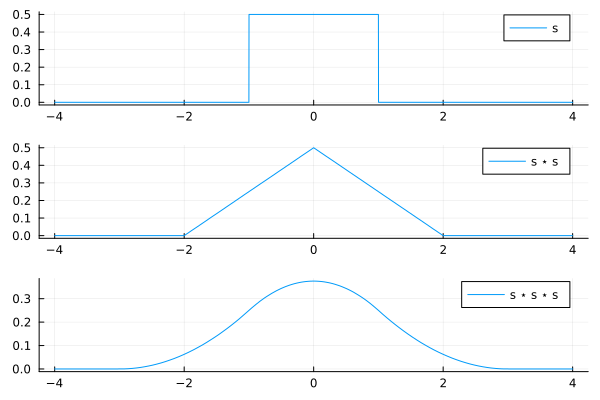

In [1]:
using Plots
trap(f,a,b,n) = 0.5*(b-a)/n*(f(a) + f(b) + 2*sum(f(a+i*(b-a)/n) for i in 1:n-1));
s(x) = float(abs(x) ≤ 1) / 2
ss(x) = trap(t-> s(t)*s(x-t),-1,1,1024)
sss(x) = trap(t-> s(t)*ss(x-t),-1,1,1024)
plot(s,-4,4,layout=(3,1),label="s")
plot!(ss,-4,4,subplot=2,label="s ⋆ s")
plot!(sss,-4,4,subplot=3,label="s ⋆ s ⋆ s")

### Analytic

For any $\sigma > 0$, we have

$$
u(x) = \frac{\sigma}{x^2+\sigma^2}, \qquad \hat{u}(k) = \pi e^{-\sigma|k| }. 
$$

For a complex argument, $u$ is meromorphic with simple poles at $z=\pm i\sigma$. Clearly, $u$ is Level 3 with any $a < \sigma$. If we were to use $a=\sigma$, then 

$$
\int_{-\infty}^\infty \frac{\sigma^2}{|(x+iy)^2 + \sigma^2|^2} \, dx
$$

cannot be bounded uniformly as $y\to a$, thanks to the nonintegrable singularity at the pole. (This explains the need for the $\epsilon$ in the Level 3 results.)

### Entire

If we use $f(x) = \sin(x)/x$, then its transform is (up to a constant factor) the square wave $s(k)$. Note that $f$ has a removable singularity at the origin and is entire, while $|f(z)|$ is maximized in the imaginary directions and is bounded by $e^{|z|}/|z| = o(e^{|z|})$. This makes its transform be supported in $[-1,1]$. 

An interesting edge case is the Gaussian, $u(x)=e^{-x^2/2\sigma^2}$. It is entire but *not* of exponential type $a$ for any value of $a$. Its transform is another Gaussian, which correspondingly decays more rapidly than an exponential but is not compactly supported.


## Numerical experiment

### p7: accuracy of periodic spectral differentiation

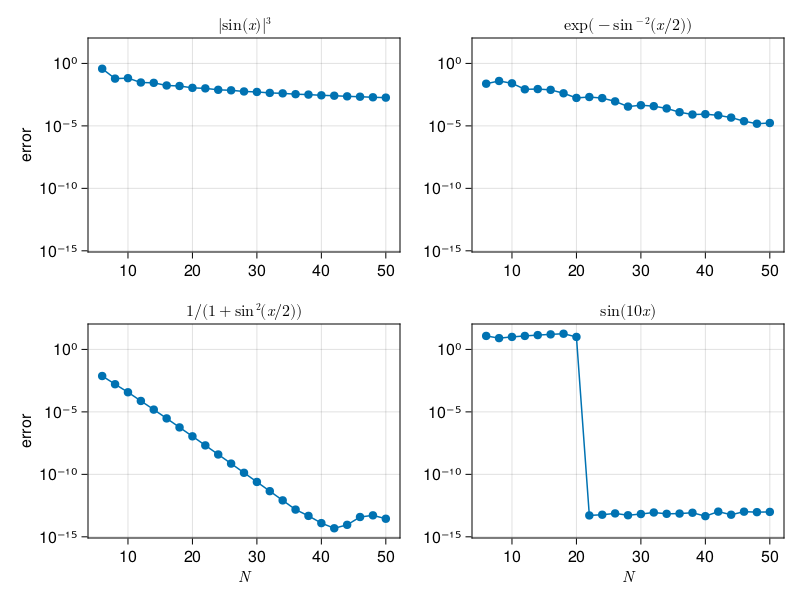

In [2]:
using LinearAlgebra, LaTeXStrings
N = 6:2:50
@assert(all(iseven.(N)),"N must be even")

# Compute derivatives for various values of N:
Nmax = maximum(N)
data = [ 
    # uʹʹʹ in BV
    (x -> abs(sin(x))^3,  x -> 3 * sin(x) * cos(x) * abs(sin(x)), 
        L"|\sin(x)|^3"), 
    # C-infinity
    (x -> exp(-sin(x / 2)^(-2)), 
        x -> 0.5exp(-sin(x / 2)^(-2)) * sin(x) / sin(x / 2)^4, 
        L"\exp(-\sin^{-2}(x/2))"), 
    # analytic in a strip
    (x -> 1 / (1 + sin(x / 2)^2), 
        x -> -sin(x / 2) * cos(x / 2) / (1 + sin(x / 2)^2)^2,
        L"1/(1+\sin^2(x/2))" ),
    # band-limited 
    (x -> sin(10x), x -> 10cos(10x),  L"\sin(10x)")
]

results = []
for (i, (fun,deriv,title)) in enumerate(data)
    E = zeros(length(N))
    for (k,N) in enumerate(N)
        h = 2π / N
        x = h * (1:N)
        entry(k) = k==0 ? 0.0 : 0.5 * (-1)^k * cot(k * h / 2)
        D = [ entry(mod(i-j, N)) for i in 1:N, j in 1:N ]
        E[k] = norm(D*fun.(x) - deriv.(x), Inf)
    end
    push!(results, (;E, title))
end

# Plot results:
using CairoMakie

fig = Figure()
ax = [ Axis(fig[j,i], yscale=log10) for i in 1:2, j in 1:2 ]
for (ax,r) in zip(vec(ax),results)
    ax.title = r.title
    scatterlines!(ax, N, r.E)
end
linkxaxes!(ax...)
linkyaxes!(ax...)
ax[1,1].ylabel = ax[1,2].ylabel = "error"
ax[1,2].xlabel = ax[2,2].xlabel = L"N"
fig

## Eigenvalues

The eigenvalues of differential operators can be approximated in much the same manner as BVP solutions. Consider

$$
-u'' + x^2 u = \lambda u, \quad x \in \mathbb{R}.
$$

The exact eigenvalues are the odd positive integers, and the eigenfunctions decay superexponentially. By discretizing the problem over $[-L,L]$ for sufficiently large $L$, the eigenfunctions will be so small at the ends as to be periodically extendable for numerical purposes. 


### p8: eigenvalues of harmonic oscillator

In [3]:
using PrettyTables

N = 6:6:36
L = 8                             # domain is [-L L], periodic
λ = zeros(4,0)
for N in N
    h = 2π / N
    x = [ (L/π)*(i*h - π) for i in 1:N ]
    entry(k) = k==0 ? -π^2 / 3h^2 - 1/6 : -0.5 * (-1)^k / sin(h * k / 2)^2
    D² = [(π / L)^2 * entry(mod(i-j, N)) for i in 1:N, j in 1:N]  # 2nd-order differentiation
    λ = [ λ eigvals(-D² + diagm(x .^ 2))[1:4] ]
end
header = ["N = $n" for n in N]
pretty_table(λ; header, formatters=ft_printf("%.14f"))

┌───────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┐
│             N = 6 │           N = 12 │           N = 18 │           N = 24 │           N = 30 │           N = 36 │
├───────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┤
│  0.46147291699547 │ 0.97813728129861 │ 0.99997000149932 │ 0.99999999762906 │ 1.00000000000002 │ 1.00000000000000 │
│  7.49413462105052 │ 3.17160532064718 │ 3.00064406679583 │ 3.00000009841089 │ 3.00000000000075 │ 2.99999999999999 │
│  7.72091605300656 │ 4.45593529116678 │ 4.99259532440771 │ 4.99999796527330 │ 4.99999999997561 │ 5.00000000000000 │
│ 28.83248377834011 │ 8.92452905811993 │ 7.03957189798149 │ 7.00002499815656 │ 7.00000000050865 │ 7.00000000000001 │
└───────────────────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┴──────────────────┘
